# **Laboratório de Árvores de Decisão**
*Prof. Dr. Orlando Junior*



Neste laboratório você irá aplicar na prática os conhecimentos aprendidos em aprendizagem de máquina e árvores de decisão em um problema real utilizando a linguagem Python.

Siga as dicas deste notebook para realizar os exercícios e chegar nas respostas corretas.

## Classificação de vinhos

A degustação de vinhos é uma fina arte que permite a classificação automática de vinhos por Inteligência Artificial. Quando se trata de classificação de vinhos, a prática é bastante variada em função da região de origem e da época. Trata-se de uma das tradições mais saborosas, que também é [protegida por lei](http://www.planalto.gov.br/ccivil_03/leis/1980-1988/l7678.htm) própria em certas regiões, incluindo o Brasil. A classificação pode variar com base em diferentes fatores, como a vindima, a doçura, os estilos de vinificação, a variedade, a mistura e muitos outros.

![picture](https://cdn.jornaldebrasilia.com.br/wp-content/uploads/2021/02/05121909/vinhos-1000x600.jpg)

**Objetivo:** o objetivo deste notebook é realizar a classificação de vinhos conforme a sua qualidade utilizando um índice entre 0 e 10.

**Dados:** os dados que serão explorados foram coletados a partir de uma análise química de vinhos cultivados na mesma região da Itália, mas derivados de diferentes cultivares. A análise determinou as quantidades de 13 constituintes encontrados em cada um dos três tipos de vinhos.

**Características dos dados:**
* Características do conjunto de dados: multivariado
* Número de instâncias: 178
* Características dos atributos: inteiro, real
* Número de atributos: 13
* Possui valores ausentes?: Não

**Atributos de entrada:**
1. Alcohol
2. Malic acid
3. Ash
4. Alcalinity of ash
5. Magnesium
6. Total phenols
7. Flavanoids
8. Nonflavanoid phenols
9. Proanthocyanins
10. Color intensity
11. Hue
12. OD280/OD315 of diluted wines
13. Proline

**Atributo de saída:** qualidade (índice de 0 a 10)

## Laboratório

1. Importe as bibliotecas Python necessárias para realizar todo o projeto.

In [1]:
# Vamos atualizar o sklearn no Colab
!pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 21.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [2]:
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt

2. Carregue o conjunto de dados em memória.

In [3]:
wine = load_wine()

3. Apresente os dados do conjunto.

In [4]:
print(wine.data)

[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]


4. Apresente o formato dos dados de entrada.

In [6]:
print(wine.data.shape)

(178, 13)


5. Apresente os atributos de saída.

In [7]:
print(wine.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


6. Separe o conjunto de dados em entrada/saída.

In [8]:
X = pd.DataFrame(wine.data, columns=wine.feature_names)

In [9]:
y = pd.DataFrame(wine.target, columns=['classe'])

7. Apresente as 20 primeiras linhas dos dados de entrada.

In [11]:
X.head(21)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0


8. Apresente as 8 primeiras linhas dos dados de saída.

In [12]:
y.head(8)

,classe
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0


9. Apresente estatísticas dos dados de entrada.

In [17]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
malic_acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
alcalinity_of_ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
color_intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


10. Apresente a distribuição das classes.

In [18]:
y.value_counts()

classe
1         71
0         59
2         48
Name: count, dtype: int64

11. Separe o conjunto de dados em dois subconjuntos disjuntos, sendo o subconjunto de treinamento com 75% dos dados e o subconjunto de teste com 25% dos dados restantes. Controle a aleatoriedade da divisão utilizando a `semente 42`.

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True, random_state=42)

12. Apresente a quantidade de exemplos em cada subconjunto.

In [20]:
print("Treinamento:", len(X_train))
print("Teste:", len(X_test))

Treinamento: 133
Teste: 45


13. Construa uma árvore de decisão e ajuste um modelo de árvores aos dados de treinamento:
* Utilize a `entropia` como função para medir a qualidade do teste de divisão;
* Controle a aleatoriedade do estimador utilizando a `semente 42`;
* Defina o peso das classes como `balanceado`.

In [36]:
dt = DecisionTreeClassifier(criterion='entropy', random_state=42, class_weight='balanced') # peso das classes
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       random_state=42)

In [37]:
print(export_text(dt, feature_names=wine.feature_names, class_names=wine.target_names))

|--- od280/od315_of_diluted_wines <= 2.19
|   |--- hue <= 0.90
|   |   |--- flavanoids <= 1.49
|   |   |   |--- class: class_2
|   |   |--- flavanoids >  1.49
|   |   |   |--- class: class_1
|   |--- hue >  0.90
|   |   |--- alcohol <= 13.19
|   |   |   |--- class: class_1
|   |   |--- alcohol >  13.19
|   |   |   |--- class: class_2
|--- od280/od315_of_diluted_wines >  2.19
|   |--- alcohol <= 12.79
|   |   |--- class: class_1
|   |--- alcohol >  12.79
|   |   |--- proline <= 655.00
|   |   |   |--- class: class_1
|   |   |--- proline >  655.00
|   |   |   |--- hue <= 1.28
|   |   |   |   |--- class: class_0
|   |   |   |--- hue >  1.28
|   |   |   |   |--- class: class_1



In [ ]:
## Antigo

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=42, splitter='best')

14. Apresente a quantidade de atributos utilizada pela árvore induzida.

---



In [46]:
dt.max_features_

13

15. Apresente o nome e a importância de todos os atributos segundo a árvore induzida em ordem de importância.

In [56]:
dt.feature_names_in_

array(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'], dtype=object)

In [57]:
dt.feature_importances_

array([0.30459424, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.02834773, 0.        , 0.        , 0.        ,
       0.0913456 , 0.49316683, 0.08254561])

In [66]:
import pandas as pd

df = pd.DataFrame({'Atributo': dt.feature_names_in_,
                   'Importancia':dt.feature_importances_})
df.sort_values('Importancia', ascending = False)

,Atributo,Importancia
11,od280/od315_of_diluted_wines,0.493167
0,alcohol,0.304594
10,hue,0.091346
12,proline,0.082546
6,flavanoids,0.028348
1,malic_acid,0.000000
2,ash,0.000000
3,alcalinity_of_ash,0.000000
4,magnesium,0.000000
5,total_phenols,0.000000


16. Plote um gráfico de barras apresentado a importância dos atributos.

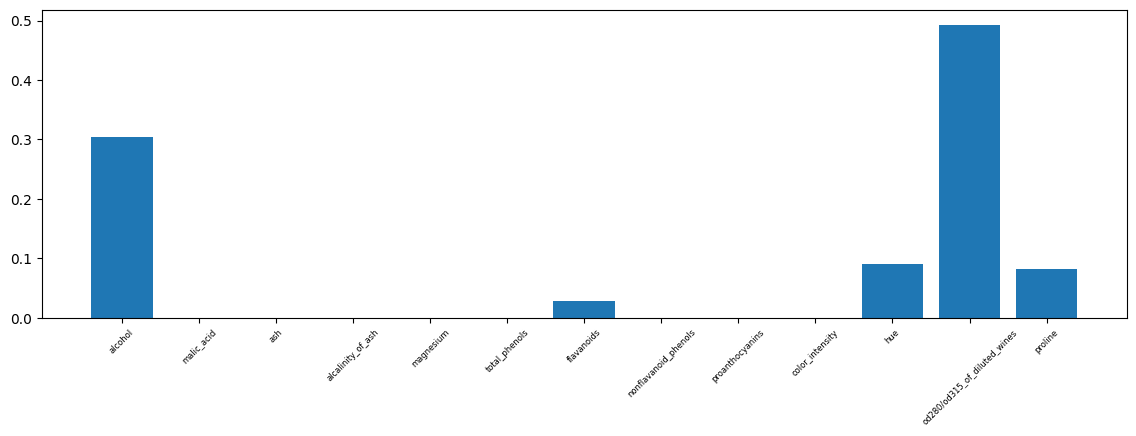

In [98]:
import matplotlib.pyplot as plt

Atributos = df['Atributo']
Importancia = df['Importancia']
plt.figure(figsize=(14,4))
plt.xticks(rotation=45, fontsize=6)
plt.bar(Atributos, Importancia)
plt.show()

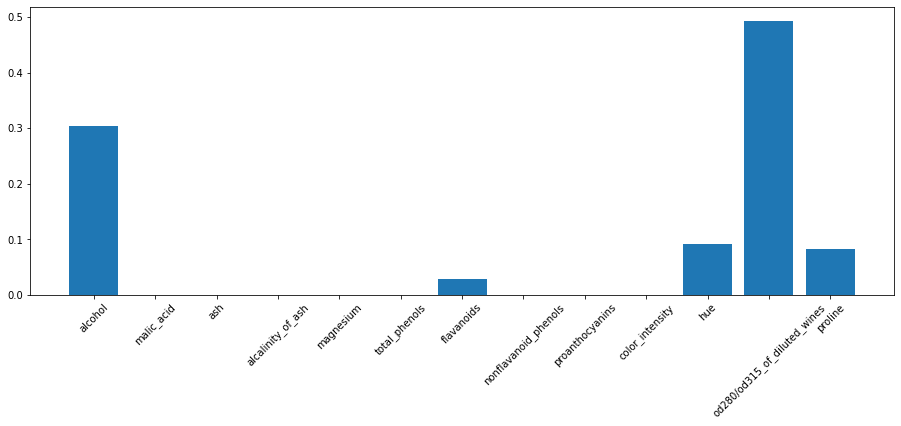

17. Realize a predição do modelo construído sobre os dados de teste.

In [99]:
y_pred = dt.predict(X_test)

In [100]:
print(y_pred)

[0 0 1 0 1 0 1 2 1 0 0 1 0 2 0 1 1 1 0 1 0 1 1 2 2 2 1 1 1 0 0 1 2 0 0 0 2
 2 1 2 0 1 1 2 2]


In [101]:
print(y_pred.shape)

(45,)


18. Construa e apresente uma matriz de confusão comparando os resultados entre os dados de teste e os dados preditos.

In [102]:
cm = confusion_matrix(y_true=y_test, y_pred=y_pred, labels=[0, 1, 2])

In [103]:
cm

array([[15,  0,  0],
       [ 0, 16,  2],
       [ 1,  2,  9]])

[[15  0  0]
 [ 0 16  2]
 [ 1  2  9]]


19. Plote um mapa de calor com a matriz de confusão gerada.

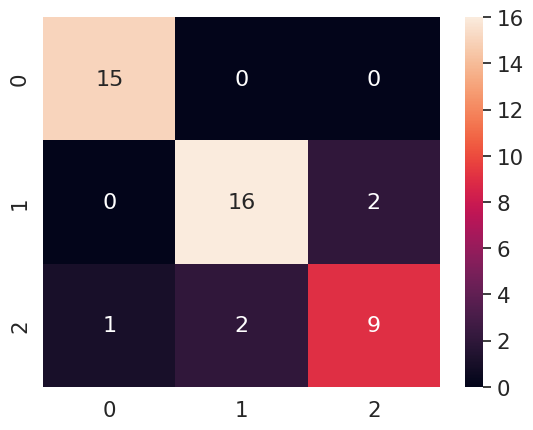

In [105]:
df_cm = pd.DataFrame(cm, range(3), range(3))
#plt.figure(figsize=(10,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16})

plt.show()

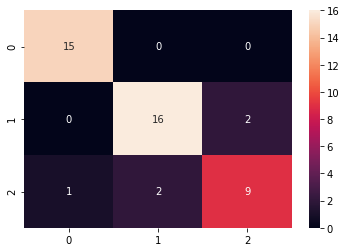

20. Apresente a acurácia do modelo em percentagem.

In [ ]:
print("Acurácia do modelo: %.3f" % accuracy_score(y_test, y_pred))

Acurácia do modelo: 0.889


Acurácia do modelo: 88.89%


**Bônus 1: plote a árvore gerada.**

*Utilize mais de uma linha de código, se necessário.*

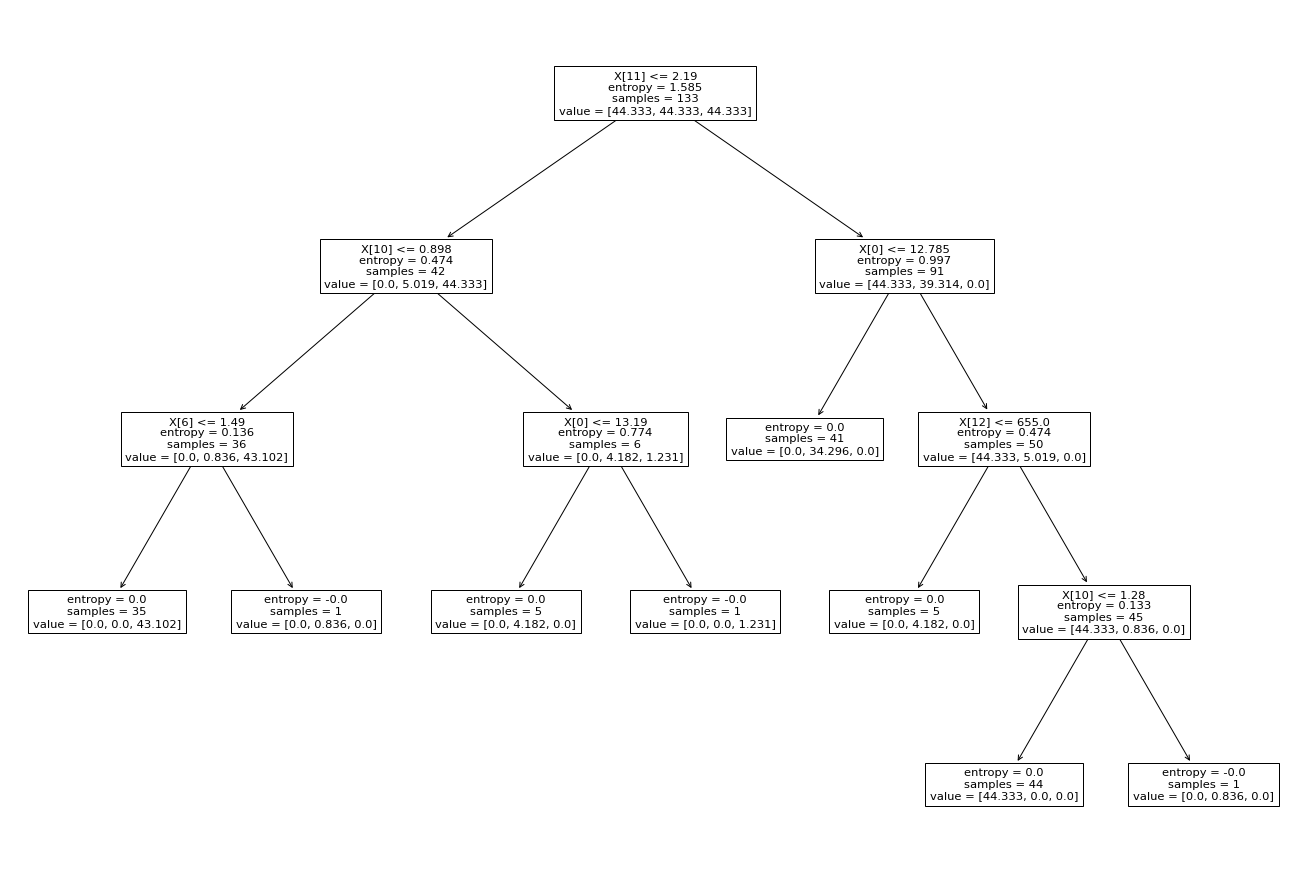

**Bônus 2: apresente a estrutura árvore gerada.**

*Utilize mais de uma linha de código, se necessário.*

|--- od280/od315_of_diluted_wines <= 2.19
|   |--- hue <= 0.90
|   |   |--- flavanoids <= 1.49
|   |   |   |--- class: 2
|   |   |--- flavanoids >  1.49
|   |   |   |--- class: 1
|   |--- hue >  0.90
|   |   |--- alcohol <= 13.19
|   |   |   |--- class: 1
|   |   |--- alcohol >  13.19
|   |   |   |--- class: 2
|--- od280/od315_of_diluted_wines >  2.19
|   |--- alcohol <= 12.79
|   |   |--- class: 1
|   |--- alcohol >  12.79
|   |   |--- proline <= 655.00
|   |   |   |--- class: 1
|   |   |--- proline >  655.00
|   |   |   |--- hue <= 1.28
|   |   |   |   |--- class: 0
|   |   |   |--- hue >  1.28
|   |   |   |   |--- class: 1

